# problem 1


In [8]:
import numpy as np
import numpy.linalg as la

mass_estimates = {('a', 'b', 'c'): 551.03,
                  ('a', 'b', 'd'): 353.19,
                  ('a', 'b', 'e'): 574.36,
                  ('a', 'c', 'd'): 506.1,
                  ('a', 'c', 'e'): 724.92,
                  ('a', 'd', 'e'): 531.9,
                  ('b', 'c', 'd'): 478.21,
                  ('b', 'c', 'e'): 701.98,
                  ('b', 'd', 'e'): 504.75,
                  ('c', 'd', 'e'): 653.07
                  }

b = np.array([551.03, 353.19, 574.36, 506.1, 724.92, 531.9, 478.21, 701.98, 504.75, 653.07])

In [15]:
def sbv(i,n):
    # return the ith standard basis vector of length n
    return np.array([1 if j == i else 0 for j in range(n)])

def sbv_list(elem,ls):
    # return the standard basis vector determined by the position of `elem` in the list `ls`
    return sbv(list(ls).index(elem),len(ls))

parts = ['a','b','c','d','e']

M = np.array([sbv_list(x,parts) + sbv_list(y,parts) + sbv_list(z,parts) for (x,y,z) in mass_estimates.keys()])
M



array([[1, 1, 1, 0, 0],
       [1, 1, 0, 1, 0],
       [1, 1, 0, 0, 1],
       [1, 0, 1, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 0, 0, 1, 1],
       [0, 1, 1, 1, 0],
       [0, 1, 1, 0, 1],
       [0, 1, 0, 1, 1],
       [0, 0, 1, 1, 1]])

In [16]:

sol = la.lstsq(M,b,rcond=None)
sol[0]

array([150.58166667, 124.58833333, 275.185     ,  79.155     ,
       300.40833333])

In [17]:
x=sol[0]
np.sum(x)

929.9183333333333

In [18]:
b - M @ x

array([ 0.675     , -1.135     , -1.21833333,  1.17833333, -1.255     ,
        1.755     , -0.71833333,  1.79833333,  0.59833333, -1.67833333])

# problem 2


In [19]:
height_estimates = {0.0: 199.6,
                    0.25: 202.96,
                    0.5: 207.23,
                    0.75: 208.29,
                    1.0: 207.47,
                    1.25: 203.96,
                    1.5: 199.18,
                    1.75: 202.91,
                    2.0: 204.29,
                    2.25: 196.31,
                    2.5: 195.71,
                    2.75: 187.89,
                    3.0: 187.61,
                    3.25: 177.12,
                    3.5: 171.07,
                    3.75: 171.89,
                    4.0: 158.68,
                    4.25: 152.64,
                    4.5: 146.7,
                    4.75: 138.52,
                    5.0: 127.27,
                    5.25: 122.38,
                    5.5: 103.97,
                    5.75: 96.91,
                    6.0: 83.08,
                    6.25: 67.34,
                    6.5: 55.75,
                    6.75: 45.42,
                    7.0: 25.33,
                    7.25: 14.67,
                    7.5: -1.45}

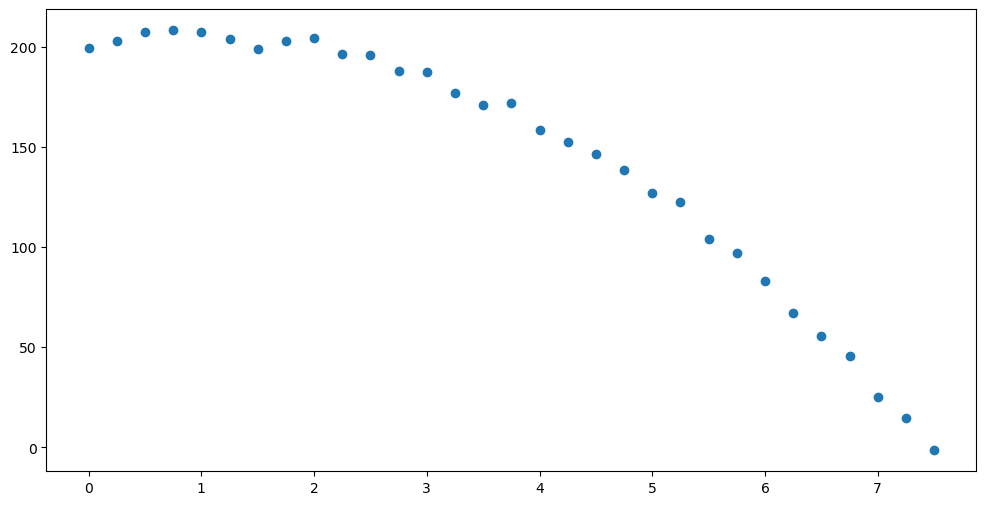

In [20]:

   import matplotlib.pyplot as plt
   
   def plot_data(x,y):
     fig, ax = plt.subplots(figsize=(12,6))
     return ax.plot(x,y,"o")
   
   x1 = height_estimates.keys()
   y1 = list(height_estimates.values())
   plot_data(x1,y1)   

In [24]:
x = np.array([ x for x in height_estimates.keys()])
x

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
       2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25,
       5.5 , 5.75, 6.  , 6.25, 6.5 , 6.75, 7.  , 7.25, 7.5 ])

In [27]:
y = np.array([ y for y in height_estimates.values()])
y

array([199.6 , 202.96, 207.23, 208.29, 207.47, 203.96, 199.18, 202.91,
       204.29, 196.31, 195.71, 187.89, 187.61, 177.12, 171.07, 171.89,
       158.68, 152.64, 146.7 , 138.52, 127.27, 122.38, 103.97,  96.91,
        83.08,  67.34,  55.75,  45.42,  25.33,  14.67,  -1.45])

In [30]:
M = np.array([[t**2, t, 1] for t in height_estimates.keys()])
M

array([[ 0.    ,  0.    ,  1.    ],
       [ 0.0625,  0.25  ,  1.    ],
       [ 0.25  ,  0.5   ,  1.    ],
       [ 0.5625,  0.75  ,  1.    ],
       [ 1.    ,  1.    ,  1.    ],
       [ 1.5625,  1.25  ,  1.    ],
       [ 2.25  ,  1.5   ,  1.    ],
       [ 3.0625,  1.75  ,  1.    ],
       [ 4.    ,  2.    ,  1.    ],
       [ 5.0625,  2.25  ,  1.    ],
       [ 6.25  ,  2.5   ,  1.    ],
       [ 7.5625,  2.75  ,  1.    ],
       [ 9.    ,  3.    ,  1.    ],
       [10.5625,  3.25  ,  1.    ],
       [12.25  ,  3.5   ,  1.    ],
       [14.0625,  3.75  ,  1.    ],
       [16.    ,  4.    ,  1.    ],
       [18.0625,  4.25  ,  1.    ],
       [20.25  ,  4.5   ,  1.    ],
       [22.5625,  4.75  ,  1.    ],
       [25.    ,  5.    ,  1.    ],
       [27.5625,  5.25  ,  1.    ],
       [30.25  ,  5.5   ,  1.    ],
       [33.0625,  5.75  ,  1.    ],
       [36.    ,  6.    ,  1.    ],
       [39.0625,  6.25  ,  1.    ],
       [42.25  ,  6.5   ,  1.    ],
       [45.5625,  6.75  ,  1

In [33]:
sol = la.lstsq(M,y,rcond=None)
sol

(array([ -4.87577207,   9.52224214, 201.12954545]),
 array([197.4818912]),
 3,
 array([145.51191959,   6.8395201 ,   1.73156458]))

In [37]:
alpha,beta,delta=sol[0]
print(f"Q(x) = {alpha:.03f}*t^2 + {beta:.03f}*t + {delta:.03f}")


Q(x) = -4.876*t^2 + 9.522*t + 201.130


In [38]:
def Q(t):
	return alpha*t**2 + beta*t + delta

In [39]:
delta

201.12954545454554

In [40]:
beta

9.522242137728753

In [41]:
def plot_curve_fit(x0,f,x,y):
    # graph the line with slope alpha and y-intercept beta, and plot the data points
    #
    fig,ax = plt.subplots(figsize=(12,6))
    #ax.plot(x,alpha1*x + beta1)
    ax.plot(x,y,'o')

    ax.plot(x0,f(x0))

    return fig,ax
    

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

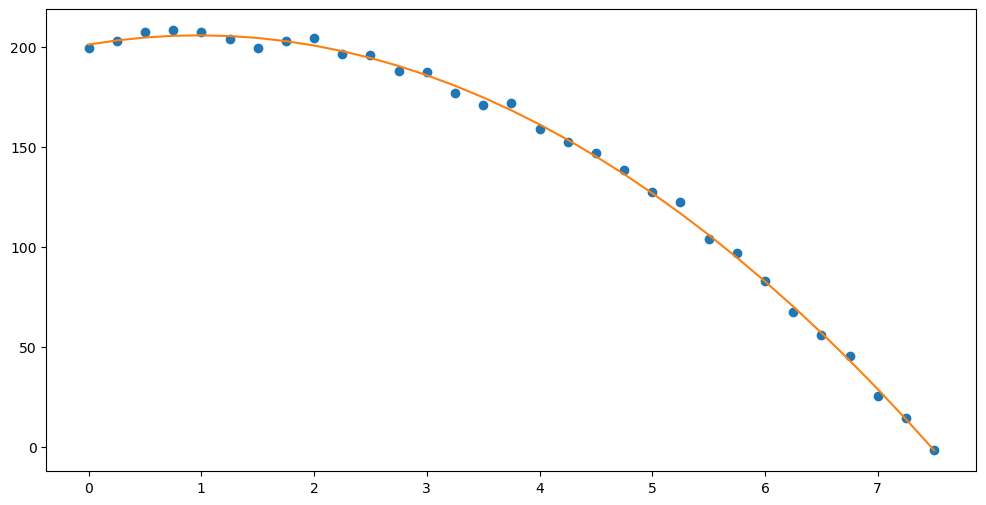

In [42]:
plot_curve_fit(x,Q,x,y)

In [45]:
N = np.array([[t,1] for t in height_estimates.keys()])
N

array([[0.  , 1.  ],
       [0.25, 1.  ],
       [0.5 , 1.  ],
       [0.75, 1.  ],
       [1.  , 1.  ],
       [1.25, 1.  ],
       [1.5 , 1.  ],
       [1.75, 1.  ],
       [2.  , 1.  ],
       [2.25, 1.  ],
       [2.5 , 1.  ],
       [2.75, 1.  ],
       [3.  , 1.  ],
       [3.25, 1.  ],
       [3.5 , 1.  ],
       [3.75, 1.  ],
       [4.  , 1.  ],
       [4.25, 1.  ],
       [4.5 , 1.  ],
       [4.75, 1.  ],
       [5.  , 1.  ],
       [5.25, 1.  ],
       [5.5 , 1.  ],
       [5.75, 1.  ],
       [6.  , 1.  ],
       [6.25, 1.  ],
       [6.5 , 1.  ],
       [6.75, 1.  ],
       [7.  , 1.  ],
       [7.25, 1.  ],
       [7.5 , 1.  ]])

In [53]:
z = np.array([9.8 * t**2 /2. + height_estimates[t] for t in height_estimates.keys()])
z

array([199.6    , 203.26625, 208.455  , 211.04625, 212.37   , 211.61625,
       210.205  , 217.91625, 223.89   , 221.11625, 226.335  , 224.94625,
       231.71   , 228.87625, 231.095  , 240.79625, 237.08   , 241.14625,
       245.925  , 249.07625, 249.77   , 257.43625, 252.195  , 258.91625,
       259.48   , 258.74625, 262.775  , 268.67625, 265.43   , 272.22625,
       274.175  ])

In [54]:
sol2 = la.lstsq(N,z,rcond=None)
sol2

(array([  9.70395161, 200.90997984]),
 array([197.84468931]),
 2,
 array([24.78130767,  2.79719328]))

In [55]:
beta1,delta1 = sol2[0]
print(f"Q(x) = {-9.8/2:.03f}*t^2 + {beta1:.03f}*t + {delta1:.03f}")



Q(x) = -4.900*t^2 + 9.704*t + 200.910


In [56]:
beta1

9.703951612903246

In [57]:
delta1


200.90997983870963

In [58]:
def Qnew(t):
   return (-9.8/2)*t**2 + beta1*t + delta1


(<Figure size 1200x600 with 1 Axes>, <Axes: >)

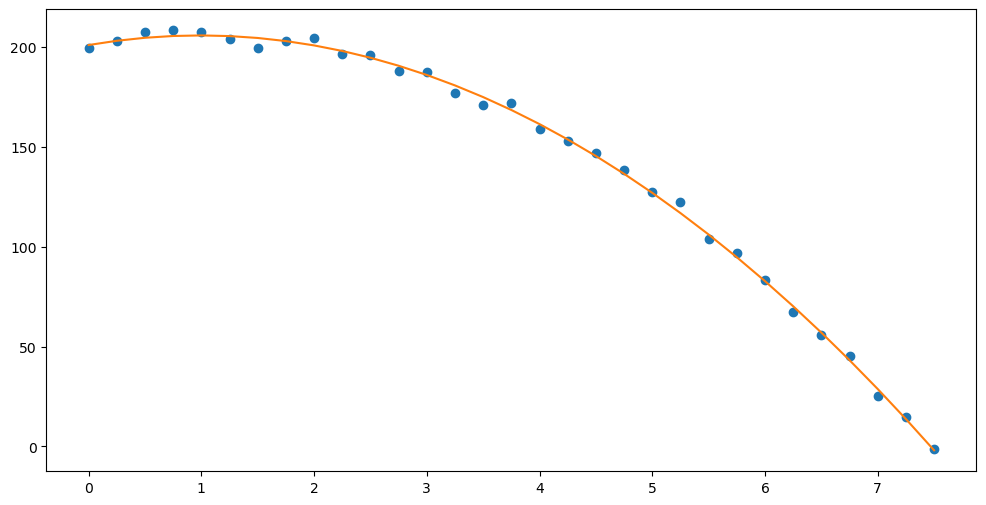

In [59]:
plot_curve_fit(x,Qnew,x,y)